<a href="https://colab.research.google.com/github/AlcirCastro/Inteligencia-Artificial-2o-Trabalho-Experimento-de-Aprendizado-Nao-Supervisionado/blob/main/Trabalho2_IA_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [3]:
df = pd.read_excel("StartUpsESG_0602.xlsx")

MINISOM

In [4]:
dicio = {}
count = 0

for index, pais in enumerate(df["Country"]):
  if pais in dicio:
    # Se estiver, atribuir o valor correspondente da classe
    df.loc[index, 'Classe_Country'] = dicio[pais]
  else:
    # Se não estiver, atribuir um novo valor de classe e atualizar o dicionário
    dicio[pais] = count
    df.loc[index, 'Classe_Country'] = count
    count += 1

In [5]:
X = df.copy()

In [6]:
X = X.drop(["Country","Classe_Country","id","StartUp","Year"],axis=1)

data = X.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=.5,random_seed=0,neighborhood_function='gaussian')
#som.pca_weights_init(data)
som.train(data, num_iteration = 10000)

In [7]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

X["Cluster"] = cluster_index

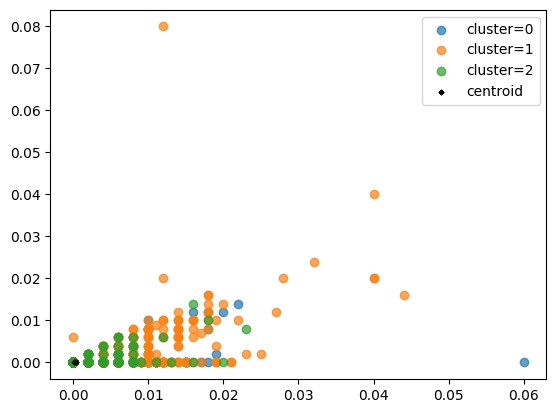

In [8]:
%matplotlib inline
#plt.xlim(0, 0.5)
#plt.ylim(0, 1)
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=5, linewidths=3, color='k', label='centroid')
plt.legend();

In [9]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X.sample(6000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [10]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [11]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [12]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [13]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [14]:
plotX["dummy"] = 0

In [15]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [16]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [17]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [18]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [19]:
alice_df = X.loc[X['Cluster'] == 0]
alice_df = alice_df[["ESG","E","S","G"," FOREIGINVEST "]]
alice_df = pd.concat([alice_df,df["Country"]], axis=1)
alice_df = pd.concat([alice_df,df["Raised"]], axis=1)
alice_dfs = alice_df.groupby("Country")[" FOREIGINVEST "].mean().reset_index()

# Ordenar os grupos com base na média dos salários em ordem decrescente
sorted_grouped_dfs = alice_dfs.sort_values(by=" FOREIGINVEST ", ascending=False)
print(sorted_grouped_dfs)

            Country   FOREIGINVEST 
108   United States    2.614820e+11
22            China    2.353650e+11
36          Germany    1.585150e+11
0       Afghanistan             NaN
1           Albania             NaN
..              ...             ...
107  United Kingdom             NaN
109   Venezuela, RB             NaN
110         Vietnam             NaN
111        Zimbabwe             NaN
112           india             NaN

[113 rows x 2 columns]


In [20]:
cluster1_df = X.loc[X['Cluster'] == 1]
cluster1_df = cluster1_df[["ESG","E","S","G"," FOREIGINVEST "]]
cluster1_df = pd.concat([cluster1_df,df["Country"]], axis=1)
cluster1_df = pd.concat([cluster1_df,df["Raised"]], axis=1)
cluster1_dfs = cluster1_df.groupby('Country')[' FOREIGINVEST '].mean().reset_index()

# Ordenar os grupos com base na média dos salários em ordem decrescente
sorted_grouped_df = cluster1_dfs.sort_values(by=' FOREIGINVEST ', ascending=False)
print(sorted_grouped_df)

                  Country   FOREIGINVEST 
41   Hong Kong SAR, China    9.703626e+10
86              Singapore    8.311079e+10
107        United Kingdom    8.115891e+10
14                 Brazil    7.816272e+10
34                 France    7.159968e+10
..                    ...             ...
22                  China             NaN
36                Germany             NaN
67            Netherlands             NaN
97            Switzerland             NaN
108         United States             NaN

[113 rows x 2 columns]


In [21]:
cluster2_df = X.loc[X['Cluster'] == 2]
cluster2_df = cluster2_df[["ESG","E","S","G"," FOREIGINVEST "]]
cluster2_df = pd.concat([cluster2_df,df["Country"]], axis=1)
cluster2_df = pd.concat([cluster2_df,df["Raised"]], axis=1)
cluster2_dfs = cluster2_df.groupby('Country')[' FOREIGINVEST '].mean().reset_index()

# Ordenar os grupos com base na média dos salários em ordem decrescente
sorted_grouped_df = cluster2_dfs.sort_values(by=' FOREIGINVEST ', ascending=False)
print(sorted_grouped_df)

           Country   FOREIGINVEST 
97     Switzerland   -1.469990e+11
67     Netherlands   -3.614670e+11
0      Afghanistan             NaN
1          Albania             NaN
2        Argentina             NaN
..             ...             ...
108  United States             NaN
109  Venezuela, RB             NaN
110        Vietnam             NaN
111       Zimbabwe             NaN
112          india             NaN

[113 rows x 2 columns]


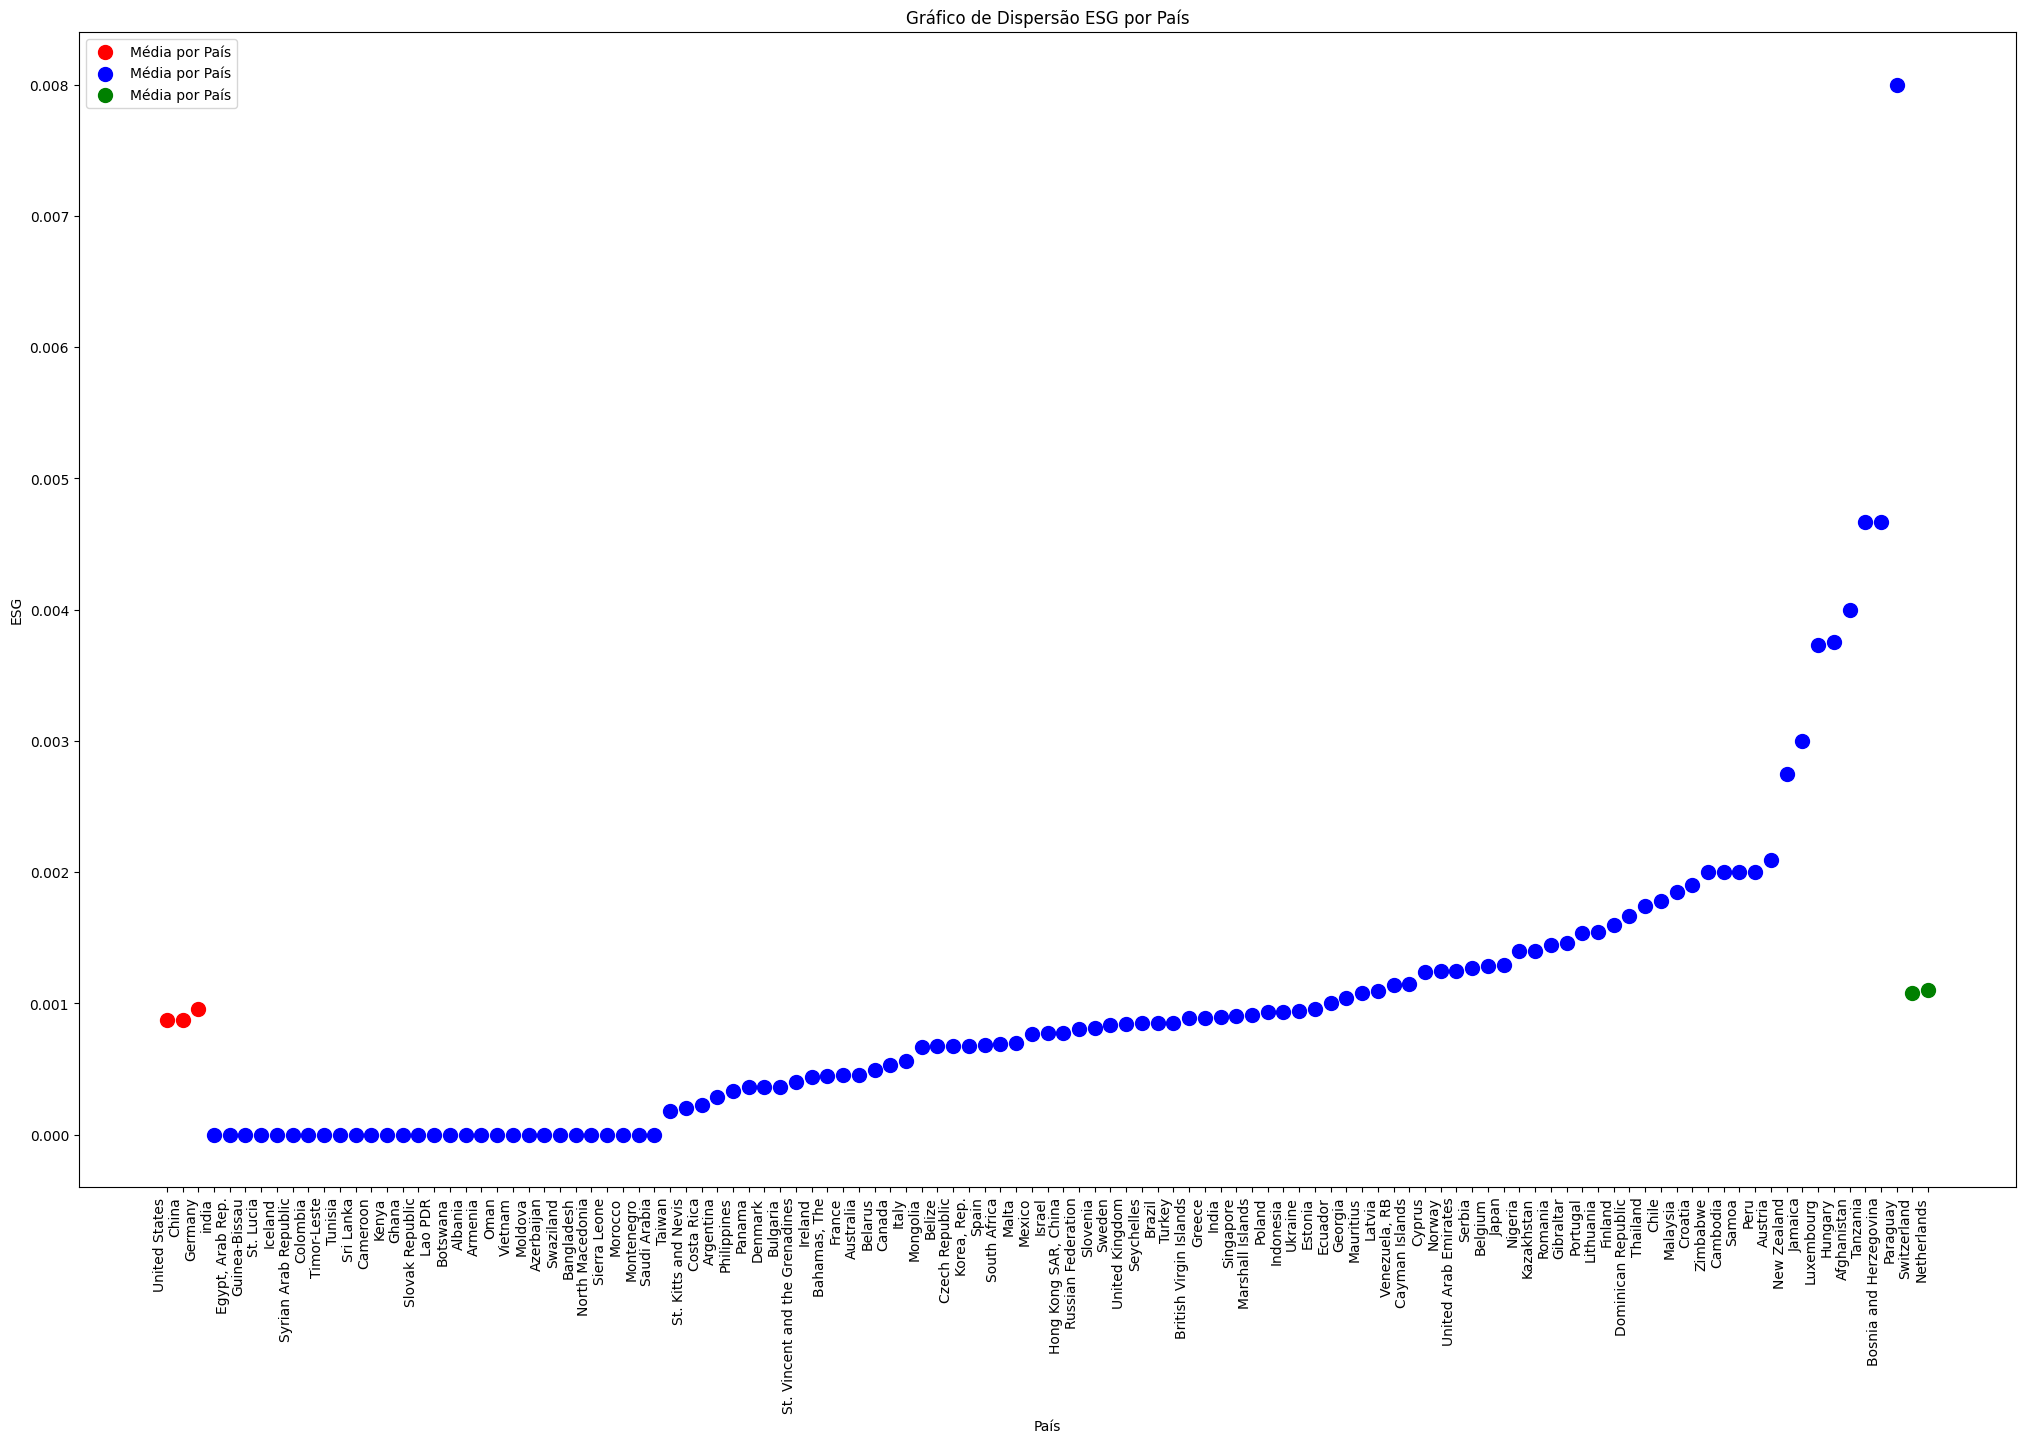

In [22]:
alice_df = alice_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_country = alice_df.groupby('Country')['ESG'].mean().reset_index()

mean_esg_by_country_sorted = mean_esg_by_country.sort_values(by='ESG')

cluster1_df = cluster1_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_countrys = cluster1_df.groupby('Country')['ESG'].mean().reset_index()

mean_esg_by_country_sorteds = mean_esg_by_countrys.sort_values(by='ESG')

cluster2_df = cluster2_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_countrys2 = cluster2_df.groupby('Country')['ESG'].mean().reset_index()

mean_esg_by_country_sorteds2 = mean_esg_by_countrys2.sort_values(by='ESG')

plt.figure(figsize=(25, 15))
plt.scatter(mean_esg_by_country_sorted["Country"], mean_esg_by_country_sorted["ESG"], color='red', s=100, label='Média por País')
plt.scatter(mean_esg_by_country_sorteds["Country"], mean_esg_by_country_sorteds["ESG"], color='blue', s=100, label='Média por País')
plt.scatter(mean_esg_by_country_sorteds2["Country"], mean_esg_by_country_sorteds2["ESG"], color='green', s=100, label='Média por País')

plt.xticks(rotation=90, ha='right')


plt.xlabel('País')
plt.ylabel('ESG')
plt.title('Gráfico de Dispersão ESG por País')


plt.legend()


plt.show()

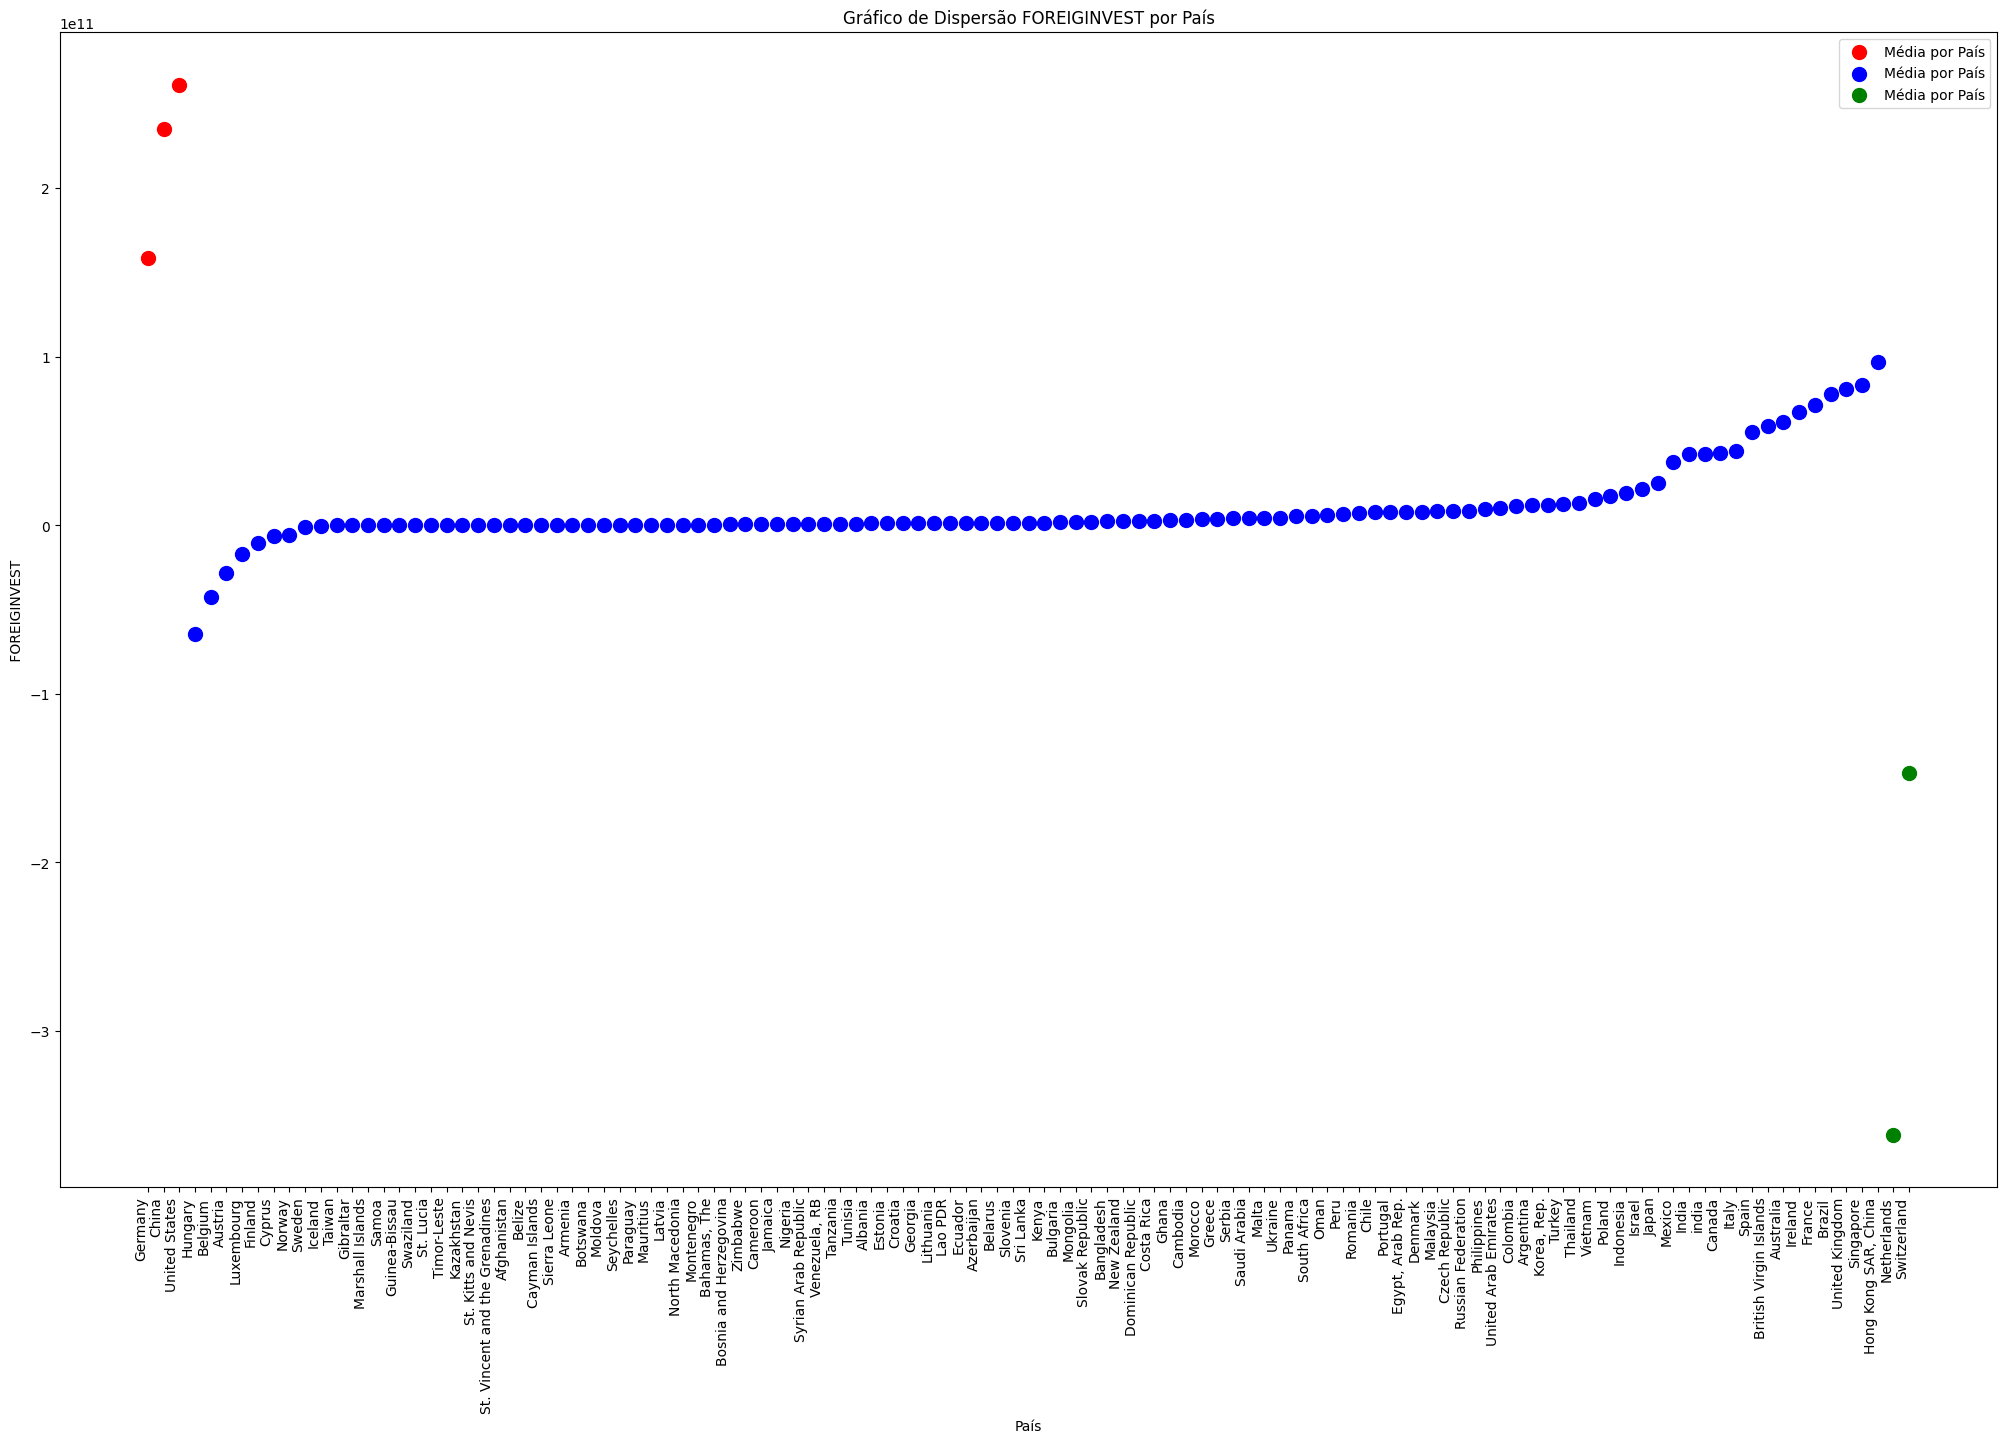

In [23]:
alice_df = alice_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_country = alice_df.groupby('Country')[' FOREIGINVEST '].mean().reset_index()

mean_esg_by_country_sorted = mean_esg_by_country.sort_values(by=' FOREIGINVEST ')

cluster1_df = cluster1_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_countrys = cluster1_df.groupby('Country')[' FOREIGINVEST '].mean().reset_index()

mean_esg_by_country_sorteds = mean_esg_by_countrys.sort_values(by=' FOREIGINVEST ')

cluster2_df = cluster2_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_countrys2 = cluster2_df.groupby('Country')[' FOREIGINVEST '].mean().reset_index()

mean_esg_by_country_sorteds2 = mean_esg_by_countrys2.sort_values(by=' FOREIGINVEST ')

plt.figure(figsize=(25, 15))
plt.scatter(mean_esg_by_country_sorteds2["Country"], mean_esg_by_country_sorteds2[" FOREIGINVEST "], color='green', s=100, label='Média por País')
plt.scatter(mean_esg_by_country_sorteds["Country"], mean_esg_by_country_sorteds[" FOREIGINVEST "], color='blue', s=100, label='Média por País')
plt.scatter(mean_esg_by_country_sorted["Country"], mean_esg_by_country_sorted[" FOREIGINVEST "], color='red', s=100, label='Média por País')

plt.xticks(rotation=90, ha='right')


plt.xlabel('País')
plt.ylabel(' FOREIGINVEST ')
plt.title('Gráfico de Dispersão FOREIGINVEST por País')


plt.legend()


plt.show()

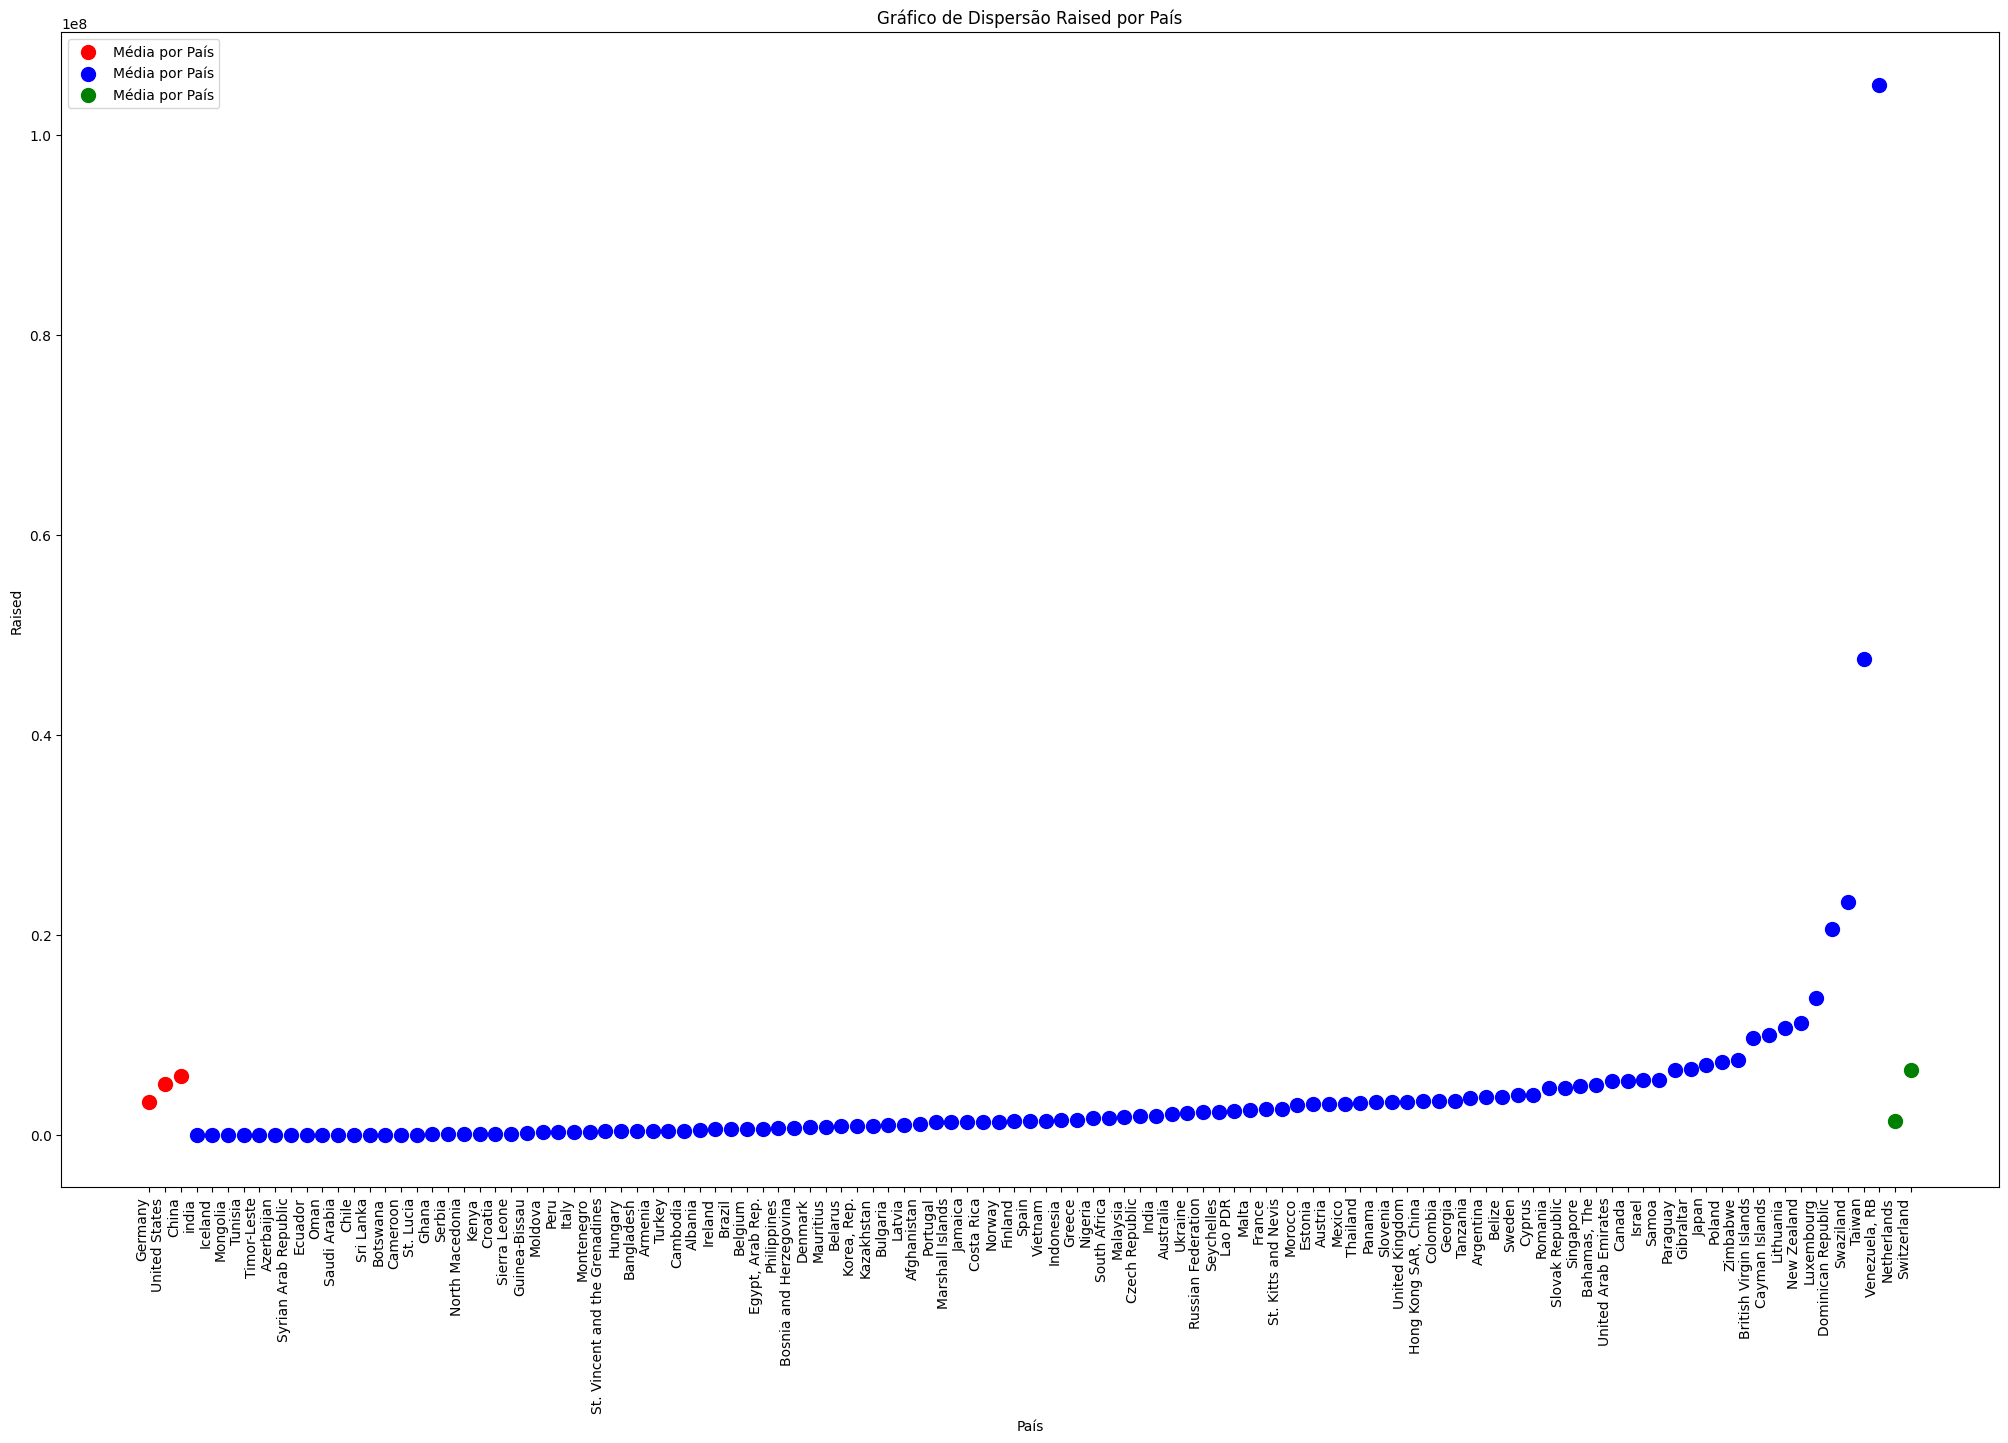

In [24]:
alice_df = alice_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_country = alice_df.groupby('Country')['Raised'].mean().reset_index()

mean_esg_by_country_sorted = mean_esg_by_country.sort_values(by='Raised')

cluster1_df = cluster1_df.dropna(subset=['Raised'])

mean_esg_by_countrys = cluster1_df.groupby('Country')['Raised'].mean().reset_index()

mean_esg_by_country_sorteds = mean_esg_by_countrys.sort_values(by='Raised')

cluster2_df = cluster2_df.dropna(subset=[' FOREIGINVEST '])

mean_esg_by_countrys2 = cluster2_df.groupby('Country')['Raised'].mean().reset_index()

mean_esg_by_country_sorteds2 = mean_esg_by_countrys2.sort_values(by='Raised')

plt.figure(figsize=(25, 15))
plt.scatter(mean_esg_by_country_sorted["Country"], mean_esg_by_country_sorted["Raised"], color='red', s=100, label='Média por País')
plt.scatter(mean_esg_by_country_sorteds["Country"], mean_esg_by_country_sorteds["Raised"], color='blue', s=100, label='Média por País')
plt.scatter(mean_esg_by_country_sorteds2["Country"], mean_esg_by_country_sorteds2["Raised"], color='green', s=100, label='Média por País')

plt.xticks(rotation=90, ha='right')


plt.xlabel('País')
plt.ylabel('Raised')
plt.title('Gráfico de Dispersão Raised por País')


plt.legend()


plt.show()

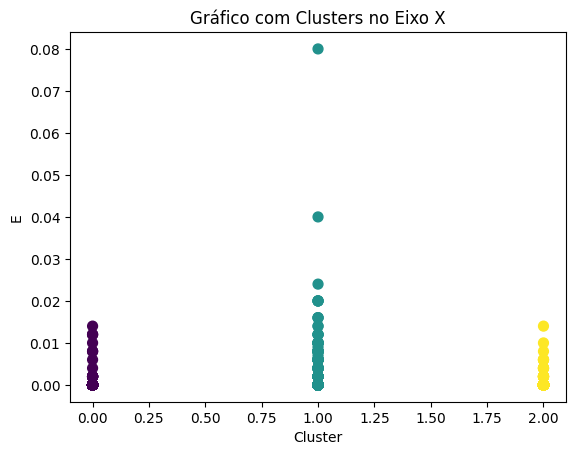

In [25]:
plt.scatter(X["Cluster"],  X["E"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('E')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

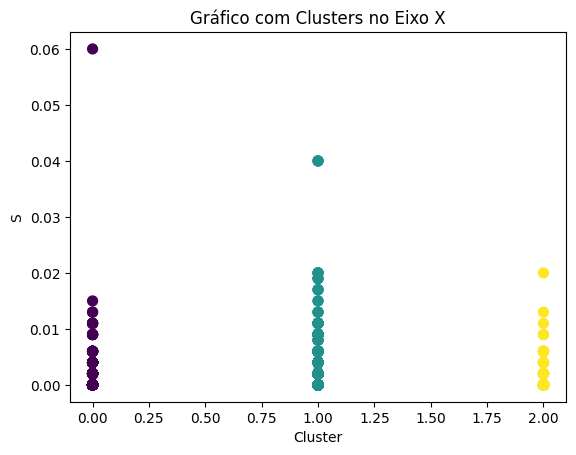

In [26]:
plt.scatter(X["Cluster"],  X["S"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('S')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

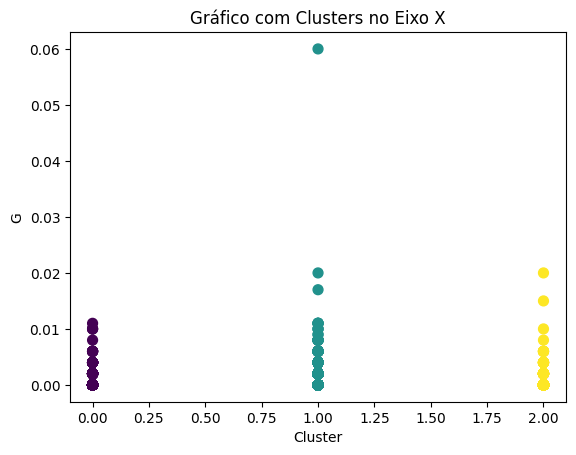

In [27]:
plt.scatter(X["Cluster"],  X["G"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('G')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

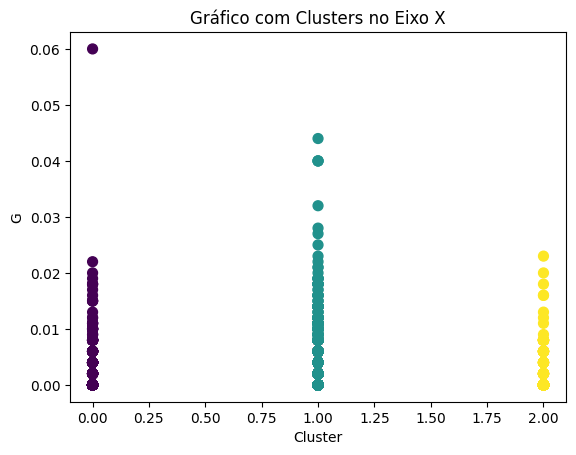

In [28]:
plt.scatter(X["Cluster"],  X["ESG"], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('G')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

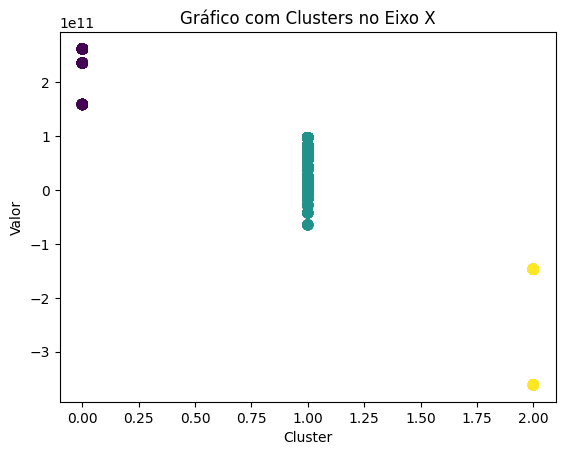

In [29]:
plt.scatter(X["Cluster"], X[" FOREIGINVEST "], c=X["Cluster"], cmap='viridis', s=50)
plt.xlabel('Cluster')
plt.ylabel('Valor')
plt.title('Gráfico com Clusters no Eixo X')
plt.show()

                  index             0
0         FOREIGINVEST   1.582790e+11
1                Raised  6.426488e+05
2               TEACHT   5.364080e+05
3                SJOUR   1.421699e+05
4                 GDPC   2.019360e+04
5              duracao   7.775987e+01
6                DCRED   4.096464e+01
7             STOCMARK   2.461295e+01
8            CONCTBANK   1.581740e+01
9               POLEST   1.395266e+01
10           FINACIFRD   1.241176e+01
11            FOREIGDP   1.137118e+01
12           FISCALFRD   1.087124e+01
13                 EPI   9.095999e+00
14           TAX_REVEN   7.762547e+00
15                GINI   6.084950e+00
16                TERT   6.057202e+00
17           TAXPROFIT   5.209559e+00
18               EDBUS   4.109251e+00
19            INTERPAY   3.034506e+00
20             HTECEXP   2.528357e+00
21            CREDINAD   1.522802e+00
22            teamsize   1.001518e+00
23             QINSTIT   9.806483e-01
24               RDEXP   9.711641e-01
25          

<ipython-input-30-f9eae2c240b7>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




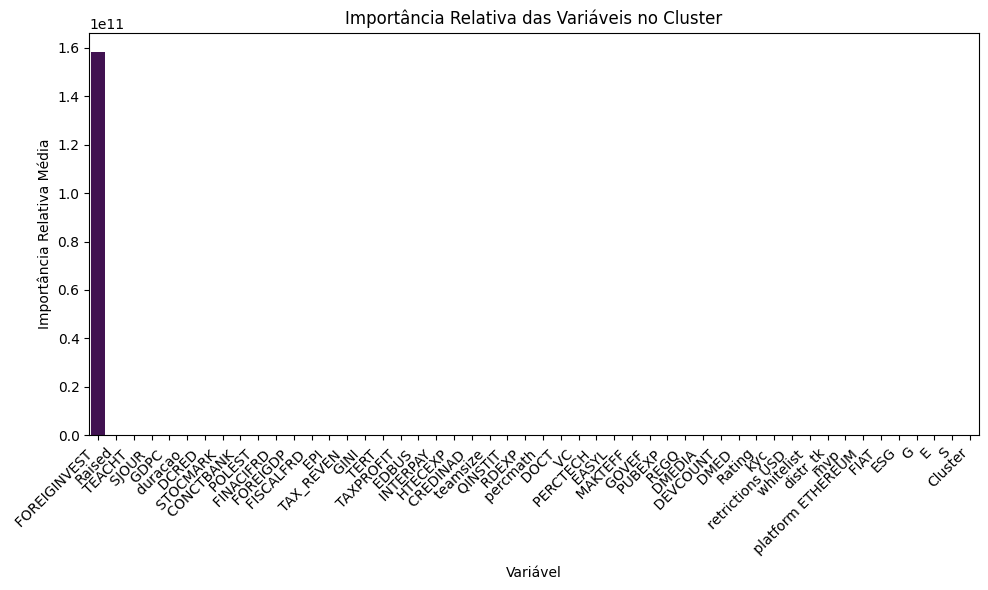

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_means = X.groupby('Cluster').mean()

# Calcular a importância relativa das variáveis em relação ao cluster (por exemplo, diferença entre a média do cluster e a média global)
cluster_importance = cluster_means.subtract(X.mean())

# Plotar as importâncias relativas das variáveis
print(cluster_importance.abs().mean().sort_values(ascending=False).reset_index())
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_importance.abs().mean().sort_values(ascending=False).reset_index(), x='index', y=0, palette='viridis')
plt.title('Importância Relativa das Variáveis no Cluster')
plt.xlabel('Variável')
plt.ylabel('Importância Relativa Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()